In [1]:
# my-login: jpoconnell2
import pandas as pd
import requests
import html
import json
import math

In [2]:
url = 'https://tyler.caraza-harter.com/cs301/fall18/data/countries.json'

In [3]:
data = pd.read_json(url)

In [4]:
total_pop = 0

In [5]:
for country in data['population']:
    total_pop += int(country)

In [6]:
#q1
total_pop

6279556636

In [7]:
url_list = 'https://tyler.caraza-harter.com/cs301/fall18/data/capitals.txt'

In [8]:
info = requests.get(url_list)
list_info = str(info.text).split('\n')



In [9]:
#q2
list_info[0]

'https://tyler.caraza-harter.com/cs301/fall18/data/capitals/ElSalvador.json'

In [10]:
master_list = []

In [11]:
for url in list_info:
    capital_info_raw = requests.get(url)
    capital_info = json.loads(capital_info_raw.text)
    master_list.append(capital_info)


In [12]:
master_frame = pd.DataFrame(master_list)

In [13]:
q3_index = master_frame[master_frame['country'] == 'China']
q3_series = q3_index['capital']
q3 = pd.Series.item(q3_series)

In [14]:
#q3
q3

'Beijing'

In [15]:
S_to_N_master_frame = master_frame.sort_values(by=['latitude'])


In [16]:
south_capitals = []
top_5_south = S_to_N_master_frame.head()
for entry in top_5_south['country']:
    south_capitals.append(entry)
q4 = json.dumps(south_capitals)

In [17]:
#q4
q4

'["New Zealand", "Australia", "Uruguay", "Argentina", "Chile"]'

In [18]:
north_capitals = []
S_to_N_master_frame = master_frame.sort_values(by=['latitude'])
top_3_N = S_to_N_master_frame.tail(3)
for entry in top_3_N['country']:
    north_capitals.append(entry)
north_capitals.reverse()
q5 = json.dumps(north_capitals)

In [19]:
#q5
q5

'["Iceland", "Finland", "Norway"]'

In [20]:
describe_data = data.describe()


In [21]:
#q6
describe_data

,area,birth-rate,coastline,death-rate,gdp-per-capita,infant-mortality,net-migration,population
count,1.750000e+02,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,1.750000e+02
mean,7.285332e+05,22.536114,10.833657,9.654971,9781.714286,38.052743,0.123314,3.588318e+07
std,2.005565e+06,11.287090,38.245751,5.187216,10612.928974,35.369320,4.466356,1.333418e+08
min,2.000000e+00,8.250000,0.000000,2.410000,500.000000,2.290000,-13.920000,7.502000e+03
25%,2.779000e+04,12.635000,0.090000,6.075000,1900.000000,8.550000,-0.905000,2.033239e+06
50%,1.431000e+05,20.340000,0.440000,8.230000,5100.000000,24.180000,0.000000,7.523934e+06
75%,5.209850e+05,30.200000,3.150000,11.965000,14450.000000,62.155000,0.770000,2.272283e+07
max,1.707520e+07,50.730000,331.660000,29.740000,55100.000000,163.070000,23.060000,1.313974e+09


In [22]:
data['literacy'] = data['literacy'].str.replace(",", ".").astype(float)
data['phones'] = data['phones'].str.replace(",", ".").astype(float)
q7 = data.describe()

In [23]:
#q7
q7

,area,birth-rate,coastline,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population
count,1.750000e+02,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,1.750000e+02
mean,7.285332e+05,22.536114,10.833657,9.654971,9781.714286,38.052743,82.182286,0.123314,214.621143,3.588318e+07
std,2.005565e+06,11.287090,38.245751,5.187216,10612.928974,35.369320,20.086897,4.466356,218.613971,1.333418e+08
min,2.000000e+00,8.250000,0.000000,2.410000,500.000000,2.290000,17.600000,-13.920000,1.300000,7.502000e+03
25%,2.779000e+04,12.635000,0.090000,6.075000,1900.000000,8.550000,69.950000,-0.905000,31.300000,2.033239e+06
50%,1.431000e+05,20.340000,0.440000,8.230000,5100.000000,24.180000,92.000000,0.000000,140.100000,7.523934e+06
75%,5.209850e+05,30.200000,3.150000,11.965000,14450.000000,62.155000,98.000000,0.770000,329.700000,2.272283e+07
max,1.707520e+07,50.730000,331.660000,29.740000,55100.000000,163.070000,100.000000,23.060000,1035.600000,1.313974e+09


In [24]:
land_lock_EU = data[(data['coastline'] == 0) & (data['continent'] == 'Europe')]
sorted_land_lock_EU = land_lock_EU.sort_values(by=['area'])
largest_land_lock_EU_array= sorted_land_lock_EU.tail(1)
largest_land_lock_EU = largest_land_lock_EU_array['country']
q8 = pd.Series.item(largest_land_lock_EU)



In [25]:
#q8
q8

'Belarus'

In [26]:
land_lock_Africa = data[(data['coastline'] == 0) & (data['continent'] == 'Africa')]
sorted_land_lock_Africa = land_lock_Africa.sort_values(by=['area'])
largest_land_lock_Africa_array= sorted_land_lock_Africa.tail(1)
largest_land_lock_Africa = largest_land_lock_Africa_array['country']
q9 = pd.Series.item(largest_land_lock_Africa)

In [27]:
#q9
q9

'Chad'

In [28]:
land_lock_SA = data[(data['coastline'] == 0) & (data['continent'] == 'South America')]
sorted_land_lock_SA = land_lock_SA.sort_values(by=['area'])
largest_land_lock_SA_array= sorted_land_lock_SA.tail(1)
largest_land_lock_SA = largest_land_lock_SA_array['country']
q10 = pd.Series.item(largest_land_lock_SA)

In [29]:
#q10
q10

'Bolivia'

In [30]:
def find_distance_manual(Country1, Country2):
    Radius_earth = 3956
    Lat1 = Country1['latitude']
    Lat2 = Country2['latitude']
    Long1 = Country1['longitude']
    Long2 = Country2['longitude']
    dlon = abs(math.radians(Long2 - Long1))
    dlat = abs(math.radians(Lat2 - Lat1))
    x = ((math.sin( dlat / 2))**2) + ((math.cos(math.radians(Lat1))) * (math.cos(math.radians(Lat2))) * ((math.sin(dlon / 2))**2))
    y = (2 * math.asin((math.sqrt(x))))
    z = Radius_earth * y

    return z

q11 = find_distance_manual({'latitude': 43.070231, 'longitude': -89.411893}, {'latitude': 43.074645, 'longitude': -89.384113})

In [31]:
#q11
q11

1.4338994920734274

In [32]:
def find_distance(Country1, Country2):
    Radius_earth = 3956
    Country1 = master_frame.set_index('country').loc[Country1]
    Country2 = master_frame.set_index('country').loc[Country2]
    Lat1 = Country1['latitude']
    Lat2 = Country2['latitude']
    Long1 = Country1['longitude']
    Long2 = Country2['longitude']
    dlon = abs(math.radians(Long2 - Long1))
    dlat = abs(math.radians(Lat2 - Lat1))
    x = ((math.sin( dlat / 2))**2) + ((math.cos(math.radians(Lat1))) * (math.cos(math.radians(Lat2))) * ((math.sin(dlon / 2))**2))
    y = (2 * math.asin((math.sqrt(x))))
    z = Radius_earth * y

    return z

In [33]:
q12 = find_distance('India', 'Brazil')

In [34]:
#q12
q12

8840.574141306945

In [35]:
pd.options.display.precision = 10
# got this from stack overflow it was rounding the values of my code when converting to a DataFrame

In [36]:
list_SA = []
# for SA_country in master_frame:
SA_countries = data[data['continent'] == 'South America']
for SA_country in SA_countries['country']:
    list_SA.append(SA_country)
list_SA_dicts = []
master_SA_dist = {}
for SA_item in list_SA:
    SA_dist = {}
    for i_manual in list_SA:
        if i_manual == SA_item:
            SA_dist[i_manual] = 'NaN'
        else:
            SA_dist[i_manual] = float(find_distance(SA_item, i_manual))
    master_SA_dist[SA_item] = SA_dist
q13 = pd.DataFrame(master_SA_dist)

    
            
        

In [37]:
#q13
q13

,Chile,Guyana,Colombia,Suriname,Brazil,Bolivia,Venezuela,Argentina,Peru,Ecuador,Uruguay,Paraguay
Argentina,690.7841682,2857.520462,2885.35561,2799.886429,1459.139733,1379.455702,3157.624051,NaN,1936.46579,2696.149591,143.0699429,646.0364417
Bolivia,1180.741903,1747.77267,1512.119255,1778.772975,1342.297074,NaN,1865.131181,1379.455702,669.9263719,1326.758656,1467.253638,906.7992558
Brazil,1869.737031,1709.071018,2275.516286,1572.674233,NaN,1342.297074,2228.69068,1459.139733,1967.770515,2344.584922,1412.096335,908.1857093
Chile,NaN,2897.553095,2636.644599,2895.810776,1869.737031,1180.741903,3043.657689,690.7841682,1531.480189,2350.207788,833.4032617,963.6355351
Colombia,2636.644599,1105.066312,NaN,1303.405134,2275.516286,1512.119255,639.3611182,2885.35561,1167.505359,451.0041191,2962.230943,2337.615967
Ecuador,2350.207788,1483.193753,451.0041191,1661.699022,2344.584922,1326.758656,1088.064118,2696.149591,823.0544909,NaN,2791.196721,2218.650964
Guyana,2897.553095,NaN,1105.066312,215.3363363,1709.071018,1747.77267,646.9698431,2857.520462,1837.860149,1483.193753,2878.638295,2214.288286
Paraguay,963.6355351,2214.288286,2337.615967,2153.855447,908.1857093,906.7992558,2544.799572,646.0364417,1558.635236,2218.650964,667.699386,NaN
Peru,1531.480189,1837.860149,1167.505359,1944.750017,1967.770515,669.9263719,1705.418003,1936.46579,NaN,823.0544909,2046.571589,1558.635236
Suriname,2895.810776,215.3363363,1303.405134,NaN,1572.674233,1778.772975,861.4567862,2799.886429,1944.750017,1661.699022,2809.744412,2153.855447


In [38]:
# for country_SA in q13:
#     print(country_SA)
#     q14 = q13.replace({country_SA : { country_SA : 0}})
# print(q14)
# # q_14_mean_table = pd.DataFrame.mean(q13)
# # print(q_14_mean_table)
list_SA1 = []
SA_countries1 = data[data['continent'] == 'South America']
for SA_country1 in SA_countries1['country']:
    list_SA1.append(SA_country1)
list_SA_dicts1 = []
master_SA_dist1 = {}
for SA_item1 in list_SA1:
    SA_dist1 = {}
    for i_manual1 in list_SA1:
        if i_manual1 == SA_item1:
            SA_dist1[i_manual1] = 0
        else:
            SA_dist1[i_manual1] = float(find_distance(SA_item1, i_manual1))
    master_SA_dist1[SA_item1] = SA_dist1
q14_data = pd.DataFrame(master_SA_dist1)
q_14_mean_table = pd.DataFrame.mean(q14_data)
q14_sorted = (pd.Series.sort_values(q_14_mean_table)).index
q14 = q14_sorted[0]

In [39]:
#q14
q14

'Bolivia'

In [40]:
master_SA_near = {}
level_1_SA_country = {}
level_1_SA_distance = {}
for even_more_SA in list_SA1:
    nearest_SA_Data = q14_data.loc[:, even_more_SA]
    q15_sorted_index = (pd.Series.sort_values(nearest_SA_Data)).index
    q15_sorted_values = (pd.Series.sort_values(nearest_SA_Data)).values
    near_country = q15_sorted_index[1]
    near_distance = q15_sorted_values[1]
    level_1_SA_country[even_more_SA] = near_country
    level_1_SA_distance[even_more_SA] = near_distance
    master_SA_near['nearest'] = level_1_SA_country
    master_SA_near['distance'] = level_1_SA_distance
q15 = pd.DataFrame(master_SA_near)

In [41]:
#q15
q15

,nearest,distance
Argentina,Uruguay,143.0699428732
Bolivia,Peru,669.9263719405
Brazil,Paraguay,908.1857092901
Chile,Argentina,690.7841682029
Colombia,Ecuador,451.0041190701
Ecuador,Colombia,451.0041190701
Guyana,Suriname,215.3363362973
Paraguay,Argentina,646.0364416629
Peru,Bolivia,669.9263719405
Suriname,Guyana,215.3363362973


In [42]:
import sqlite3
conn = sqlite3.connect('countries.db')
data.to_sql("countries_table", conn, if_exists="replace", index=False)
q16 = pd.read_sql('SELECT country, population FROM countries_table WHERE continent = "North America" and population < 100000 ORDER BY population ASC', conn)

In [43]:
#q16
q16

,country,population
0,Anguilla,13477
1,Cayman Islands,45436
2,Bermuda,65773
3,Dominica,68910
4,Aruba,71891
5,Grenada,89703


In [44]:
q17 = pd.read_sql('SELECT country, population FROM countries_table WHERE continent = "Europe"  ORDER BY population DESC LIMIT 3', conn)

In [45]:
#q17
q17

,country,population
0,Russia,142893540
1,Germany,82422299
2,Turkey,70413958


In [46]:
q18 = pd.read_sql('SELECT continent, AVG(population) as avg_pop FROM countries_table GROUP BY continent ORDER BY avg_pop DESC', conn)


In [47]:
#q18
q18

,continent,avg_pop
0,Asia,9.8418496395e+07
1,Central America,4.3516125273e+07
2,South America,3.1286805500e+07
3,Europe,1.9318377707e+07
4,Africa,1.7186542458e+07
5,North America,2.7972446154e+06
6,Australia,2.6802520833e+06


In [48]:
q19 = pd.read_sql('SELECT continent, COUNT(continent) as num_countries FROM countries_table GROUP BY continent ORDER BY num_countries ASC, continent ASC', conn)

In [49]:
#q19
q19

,continent,num_countries
0,Central America,11
1,Australia,12
2,South America,12
3,North America,13
4,Asia,38
5,Europe,41
6,Africa,48


In [50]:
q20 = pd.read_sql('SELECT continent, AVG("death-rate") as avg_death_rate FROM countries_table GROUP BY Continent HAVING avg_death_rate > 10 ORDER BY avg_death_rate DESC', conn)

In [51]:
#q20
q20

,continent,avg_death_rate
0,Africa,14.5047916667
1,Europe,10.2585365854


In [52]:
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

Text(0,0.5,'avg population per country (millions)')

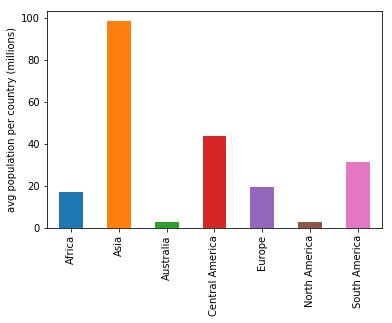

In [53]:
#q21
q21_data = pd.read_sql('SELECT continent, AVG(population) as avg_pop FROM countries_table GROUP BY continent ORDER BY avg_pop DESC', conn)
q21_dict = {}
for q21_count in range(len(q21_data['continent'])):
    q21_dict[q21_data.loc[q21_count]['continent']] = (q21_data.loc[q21_count]['avg_pop'])/1000000
q21_series = pd.Series(q21_dict)
q21_sorted = q21_series.sort_index()
q21_plot = q21_sorted.plot.bar()
q21_plot.set_ylabel('avg population per country (millions)')

Text(0,0.5,'number of countries')

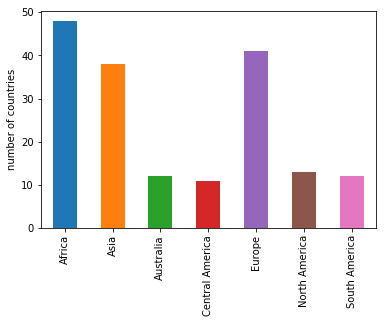

In [54]:
#q22
q22_data = pd.read_sql('SELECT continent, COUNT(continent) as num_countries FROM countries_table GROUP BY continent ORDER BY num_countries ASC, continent ASC', conn)
q22_dict = {}
for q22_count in range(len(q22_data['continent'])):
    q22_dict[q22_data.loc[q22_count]['continent']] = (q22_data.loc[q22_count]['num_countries'])
q22_series = pd.Series(q22_dict)
q22_sorted = q22_series.sort_index()
q22_plot = q22_sorted.plot.bar()
q22_plot.set_ylabel('number of countries')

Text(0,0.5,'distance to nearest neighbour (miles)')

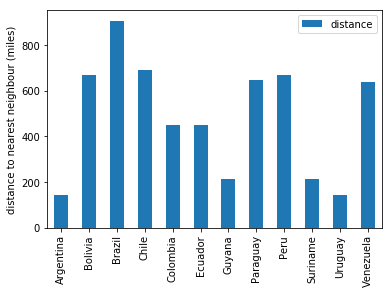

In [55]:
#q23
q23 = q15.plot.bar()
q23.set_ylabel('distance to nearest neighbour (miles)')

In [56]:
def projectpop(population, year, growth_rate):
    val = population * (math.exp(year*growth_rate))
    return val
q24_index = data[data['country'] == 'United States']
q24_series = q24_index['population']
q24_num = pd.Series.item(q24_series)
q24_list_01 = []
q24_list_05 = []
q24_list_1 = []
for q24_count in range(11):
    q24_list_01.append(projectpop(q24_num, q24_count, 0.01)/1000000)
    q24_list_05.append(projectpop(q24_num, q24_count, 0.05)/1000000)
    q24_list_1.append(projectpop(q24_num, q24_count, 0.1)/1000000)
q24_df = pd.DataFrame({
    0.01 : q24_list_01,
    0.05 : q24_list_05,
    0.1 : q24_list_1
})

Text(0.5,0,'year')

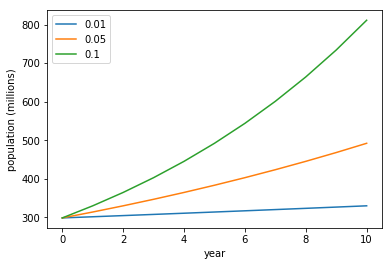

In [57]:
#q24
q24 = q24_df.plot.line()
q24.set_ylabel('population (millions)')
q24.set_xlabel('year')

In [58]:
#q25
data.corr()

,area,birth-rate,coastline,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population
area,1.0000000000,-0.1081394144,-0.0982882942,-0.0021302290,0.0822657544,-0.0632570647,0.0660407861,0.0652353646,0.1096310928,0.4628739430
birth-rate,-0.1081394144,1.0000000000,-0.1220441733,0.4003778292,-0.6395066958,0.8687265678,-0.7922723536,-0.0861806921,-0.7319244318,-0.0633819922
coastline,-0.0982882942,-0.1220441733,1.0000000000,-0.1207724681,0.1484449513,-0.1565969183,0.1365461715,0.1094837774,0.2893105543,-0.0701954358
death-rate,-0.0021302290,0.4003778292,-0.1207724681,1.0000000000,-0.2099584687,0.6278009560,-0.3430254269,0.0449466209,-0.2538932236,-0.0546194574
gdp-per-capita,0.0822657544,-0.6395066958,0.1484449513,-0.2099584687,1.0000000000,-0.6282619825,0.5179948968,0.4517001697,0.8791613560,-0.0414049725
infant-mortality,-0.0632570647,0.8687265678,-0.1565969183,0.6278009560,-0.6282619825,1.0000000000,-0.7608588620,-0.0333213553,-0.6899139546,0.0005893416
literacy,0.0660407861,-0.7922723536,0.1365461715,-0.3430254269,0.5179948968,-0.7608588620,1.0000000000,0.0015422535,0.5943221873,-0.0373251384
net-migration,0.0652353646,-0.0861806921,0.1094837774,0.0449466209,0.4517001697,-0.0333213553,0.0015422535,1.0000000000,0.3438831516,-0.0044883088
phones,0.1096310928,-0.7319244318,0.2893105543,-0.2538932236,0.8791613560,-0.6899139546,0.5943221873,0.3438831516,1.0000000000,-0.0061004235
population,0.4628739430,-0.0633819922,-0.0701954358,-0.0546194574,-0.0414049725,0.0005893416,-0.0373251384,-0.0044883088,-0.0061004235,1.0000000000


In [59]:
q26_data = data
q26_plot_data = q26_data.drop(columns=['continent', 'country', 'region', 'area', 'birth-rate', 'coastline', 'death-rate', 'gdp-per-capita', 'infant-mortality', 'net-migration', 'population'])


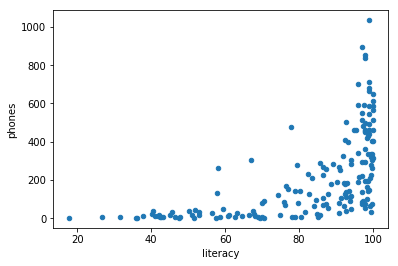

In [60]:
#q26
q26_plot_data.plot.scatter(x = 'literacy', y = 'phones')

In [61]:
q27_data = data
q27_plot_data = q27_data.drop(columns=['continent', 'country', 'region', 'area', 'phones', 'coastline', 'death-rate', 'gdp-per-capita', 'infant-mortality', 'net-migration', 'population'])

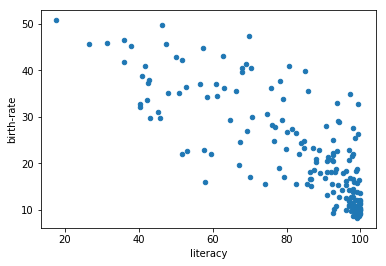

In [62]:
#q27
q27_plot_data.plot.scatter(x = 'literacy', y = 'birth-rate')

In [63]:
q28_data = data
q28_plot_data = q28_data.drop(columns=['continent', 'country', 'region', 'birth-rate', 'phones', 'coastline', 'death-rate', 'gdp-per-capita', 'infant-mortality', 'net-migration', 'population'])

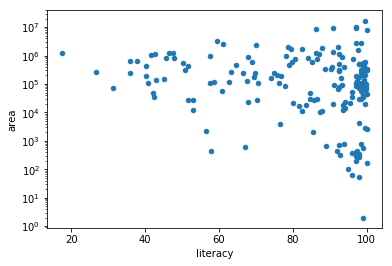

In [64]:
#q28
q28_plot_data.plot.scatter(x = 'literacy', y = 'area', logy = True)

In [65]:
q29_data = data
q29_data_edit = data[(data['continent'] == 'Europe')]
q29_plot_data = q29_data_edit.drop(columns=['continent', 'country', 'region', 'birth-rate', 'phones', 'coastline', 'death-rate', 'area', 'literacy', 'net-migration', 'population'])

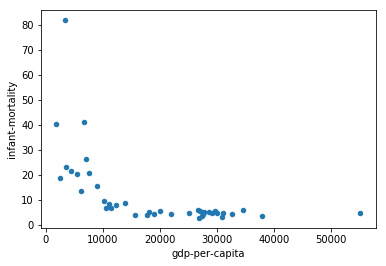

In [66]:
#q29
q29_plot_data.plot.scatter(x = 'gdp-per-capita', y = 'infant-mortality')

In [67]:
q30_data = data
q30_data_edit = data[(data['continent'] == 'Europe')]
q30_plot_data = q30_data_edit.drop(columns=['continent', 'country', 'region', 'birth-rate', 'phones', 'coastline', 'death-rate', 'area', 'literacy', 'net-migration', 'population'])
q30_gdp_list = []
q30_infant_list = []
q30_dict = []
for q30_country in q30_plot_data['gdp-per-capita']:
    q30_gdp_list.append(q30_country)
for q30_infant in q30_plot_data['infant-mortality']:
    q30_infant_list.append(q30_infant)
for q30_count in range(len(q30_infant_list)):
    q30_dict_temp = {}
    q30_dict_temp['gdp-per-capita (dollars)'] = q30_gdp_list[q30_count]
    q30_dict_temp['1/(infant-mortality)'] = 1/q30_infant_list[q30_count]
    q30_dict.append(q30_dict_temp)    
q30_df = pd.DataFrame(q30_dict)

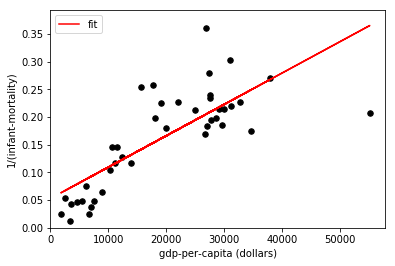

In [68]:
#q30
import numpy as np

q30_df["1"] = 1

res = np.linalg.lstsq(q30_df[["gdp-per-capita (dollars)", "1"]], q30_df["1/(infant-mortality)"], rcond=None)

# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n)
m = coefficients[0] # slope
n = coefficients[1] # intercept
ax = q30_df.plot.scatter(x='gdp-per-capita (dollars)', y='1/(infant-mortality)', c='black', s=30, xlim=0, ylim=0)

q30_df["fit"] = q30_df["gdp-per-capita (dollars)"] * m + n
q30_df.plot.line(x='gdp-per-capita (dollars)', y='fit', c='red', ax=ax)

In [69]:
conn.close()